# **Tokenizer y Modelo BERT para Análisis de Sentimientos**

In [90]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### **Código:**
- Inicializa `tokenizer` y `model` con 'nlptown/bert-base-multilingual-uncased-sentiment'

#### **Componentes:**
1. Tokenizer:
   - Convierte texto en tokens (unidades más pequeñas)
   - Prepara los datos para el modelo BERT<br><br>

2. Modelo BERT:
   - BERT: Bidirectional Encoder Representations from Transformers
   - Modelo de lenguaje preentrenado para entender contexto

#### **Función:**
- Configura un sistema para análisis de sentimientos multilingüe
- El tokenizer procesa el texto de entrada
- El modelo BERT realiza la clasificación de sentimientos

# **Análisis de Sentimiento con BERT**

In [91]:
import torch

tokens = tokenizer.encode('Malisima pelicula, parece de Cris Morena', return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

1

#### **Conceptos clave:**

1. Tensor de PyTorch:
   - Estructura de datos multidimensional similar a un array
   - Optimizado para operaciones de aprendizaje profundo en GPU/CPU
   - Permite cálculos eficientes en redes neuronales<br><br>

2. Logits:
   - Salida cruda (no normalizada) de un modelo de clasificación
   - Valores numéricos que representan la confianza del modelo en cada clase<br><br>

3. Función Softmax:
   - Convierte logits en probabilidades
   - Asigna valores entre 0 y 1 a cada logit, sumando 1 en total
   - Acentúa diferencias, haciendo que la clase más probable destaque

#### **Pasos del proceso:**

1. Tokenización:
   - Convierte el texto en tokens procesables
   - Crea un tensor de PyTorch con los tokens<br><br>

2. Predicción del modelo:
   - El modelo BERT procesa los tokens<br><br>

3. Obtención de logits:
   - Se extraen los logits del resultado del modelo<br><br>

4. Interpretación del resultado:
   - Se identifica el logit más alto (mayor confianza)
   - Se ajusta a una escala de sentimiento (1-5)

#### **Función:**
Analiza el sentimiento de una frase en español, asignando una puntuación que indica la polaridad del sentimiento.

# **Web Scraping de Reseñas de Yelp**

In [92]:
from bs4 import BeautifulSoup
import requests
import re

r = requests.get('https://www.yelp.com/biz/don-julio-buenos-aires')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [93]:
reviews[0]

"Love love loved! Wow. Luckily had a 7pm reservation and it was confirmed via WhatsApp. You get welcomed with a glass of champagne. Then after taken to your seat you receive bread, an empanada for each person. The empanada was delicious! We ordered a steak to share between two, Brussels sprouts, and fries. It was all sooo good! Definitely enough food. The Brussels sprouts came out cold through and were small. However the flavor was great. Then for desert we ordered one of the ice creams but they brought out two. One was on the house. Wow, so much food. Ice cream was so creamy. The restaurant overall service wise felt very US as I felt like they were trying to get people out quickly. It makes sense because they have reservations. However, it's not very like Argentina in that sense. I would still absolutely come back though!"

#### **Conceptos clave:**

1. Requests:
   - Biblioteca para hacer peticiones HTTP
   - Utilizada para obtener el contenido HTML de una página web<br><br>

2. BeautifulSoup:
   - Herramienta para analizar y extraer datos de HTML y XML
   - Facilita la navegación y búsqueda en el árbol DOM<br><br>

3. Expresiones regulares (regex):
   - Patrones de búsqueda flexibles para cadenas de texto
   - Usadas aquí para encontrar clases que contengan "comment"

#### **Pasos del proceso:**

1. Obtención de la página web:
   - Se realiza una petición GET a la URL de Yelp especificada<br><br>

2. Parsing del HTML:
   - Se crea un objeto BeautifulSoup con el contenido HTML obtenido<br><br>

3. Definición del patrón de búsqueda:
   - Se compila una expresión regular para buscar clases que contengan "comment"<br><br>

4. Extracción de reseñas:
   - Se buscan todos los elementos `<p>` cuya clase coincida con el patrón regex
   - Se extrae el texto de cada elemento encontrado<br><br>

5. Almacenamiento de resultados:
   - Se crea una lista con el texto de todas las reseñas extraídas

#### **Función:**
Realiza web scraping en una página de Yelp para extraer las reseñas de los usuarios, específicamente buscando comentarios en elementos `<p>` con clases que contengan la palabra "comment".

# **Análisis de Sentimiento en DataFrame**

In [94]:
import pandas as pd
import numpy as np

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

df = pd.DataFrame(np.array(reviews), columns=['review'])
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [95]:
df

,review,sentiment
0,Love love loved! Wow. Luckily had a 7pm reserv...,5
1,"There is a reason Don Julio is a must, it 100%...",5
2,"I was expecting more, honestly. We racked up a...",2
3,One of the hottest if not hottest reservations...,5
4,Celebrated my sister's birthday here and it wa...,5
5,The process of getting into the restaurant is ...,4
6,While in Argentina and Chile we ate a lot of s...,5
7,This place is listed as the number 1 steakhous...,1
8,Don Julio is often considered the best steak h...,5
9,This is one of the best meals I've ever had. W...,5


#### **Conceptos clave:**

1. Función `sentiment_score`:
   - Analiza el sentimiento de una reseña individual
   - Utiliza el tokenizer y modelo BERT previamente cargados
   - Devuelve una puntuación de sentimiento (1-5)<br><br>

2. pandas DataFrame:
   - Estructura de datos tabular para análisis eficiente
   - Permite operaciones vectorizadas en columnas<br><br>

3. Método `apply`:
   - Aplica una función a cada elemento de una columna del DataFrame

#### **Proceso:**

1. Definición de la función de puntuación:
   - Tokeniza la reseña (limitada a 512 tokens)
   - Obtiene predicción del modelo BERT
   - Convierte logits en puntuación de sentimiento<br><br>

2. Creación del DataFrame:
   - Inicializa con las reseñas extraídas previamente<br><br>

3. Análisis de sentimiento:
   - Aplica la función `sentiment_score` a cada reseña
   - Crea una nueva columna 'sentiment' con los resultados

#### **Función general:**
Procesa un conjunto de reseñas, realizando análisis de sentimiento en cada una y almacenando los resultados en un DataFrame para análisis posterior.

#### **Nota importante:**
La limitación a 512 tokens se debe a las restricciones típicas de los modelos BERT en la longitud de entrada

# **Web Scraping de Múltiples Páginas de Reseñas en Yelp**

In [96]:
base_url = 'https://www.yelp.com/biz/don-julio-buenos-aires'
all_reviews = []

for start in range(0, 361, 10):
    if start == 0:
        url = base_url
    else:
        url = f"{base_url}?start={start}"
    
    print(f"Scraping page: {url}")
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    regex = re.compile('.*comment.*')
    results = soup.find_all('p', {'class':regex})
    page_reviews = [result.text for result in results]
    
    all_reviews.extend(page_reviews)
    
    print(f"Found {len(page_reviews)} reviews on this page")
    print(f"Total reviews collected: {len(all_reviews)}")

print(f"Scraping complete. Total reviews collected: {len(all_reviews)}")

Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires
Found 10 reviews on this page
Total reviews collected: 10
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=10
Found 10 reviews on this page
Total reviews collected: 20
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=20
Found 10 reviews on this page
Total reviews collected: 30
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=30
Found 10 reviews on this page
Total reviews collected: 40
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=40
Found 10 reviews on this page
Total reviews collected: 50
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=50
Found 11 reviews on this page
Total reviews collected: 61
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=60
Found 10 reviews on this page
Total reviews collected: 71
Scraping page: https://www.yelp.com/biz/don-julio-buenos-aires?start=70
Found 10 reviews on this pa

In [97]:
len(all_reviews)

357

#### **Conceptos clave:**

1. Paginación:
   - Técnica para acceder a múltiples páginas de resultados
   - Utiliza parámetros URL para navegar (ej. "?start=10")<br><br>

2. Bucle de scraping:
   - Itera sobre múltiples páginas de reseñas
   - Acumula resultados de todas las páginas<br><br>

3. Manejo respetuoso del sitio web:
   - Impresión de progreso para monitoreo
   - Opción de añadir retrasos entre solicitudes (comentado en el código)

#### **Proceso:**

1. Configuración inicial:
   - Define la URL base del restaurante en Yelp
   - Inicializa una lista para almacenar todas las reseñas<br><br>

2. Bucle de paginación:
   - Itera de 0 a 360 en incrementos de 10 (páginas de reseñas)
   - Construye la URL para cada página<br><br>

3. Scraping de cada página:
   - Realiza una solicitud GET a la URL
   - Parsea el HTML con BeautifulSoup
   - Extrae reseñas usando regex para clases que contienen "comment"<br><br>

4. Acumulación de resultados:
   - Añade las reseñas de la página actual a la lista general
   - Imprime estadísticas de progreso<br><br>

5. Finalización:
   - Imprime el total de reseñas recolectadas

#### **Notas adicionales:**
- El código incluye una línea comentada para añadir retrasos entre solicitudes
- El rango de iteración (0 a 360) sugiere que se esperan hasta 37 páginas de reseñas

#### **Función general:**
Realiza web scraping sistemático de múltiples páginas de reseñas de un restaurante en Yelp, recopilando todas las reseñas en una sola lista para análisis posterior.

In [98]:
df = pd.DataFrame(np.array(all_reviews), columns=['review'])
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [99]:
df

,review,sentiment
0,Love love loved! Wow. Luckily had a 7pm reserv...,5
1,"There is a reason Don Julio is a must, it 100%...",5
2,"I was expecting more, honestly. We racked up a...",2
3,One of the hottest if not hottest reservations...,5
4,Celebrated my sister's birthday here and it wa...,5
...,...,...
352,Came here on recommendation from serious eats ...,4
353,"Best steak (lomo especially), provaletto, and ...",5
354,We were treated very and enjoyed our steaks ...,5
355,It's one of those environments with phenomenal...,5


# **Análisis de Reseñas del Restaurante Don Julio**

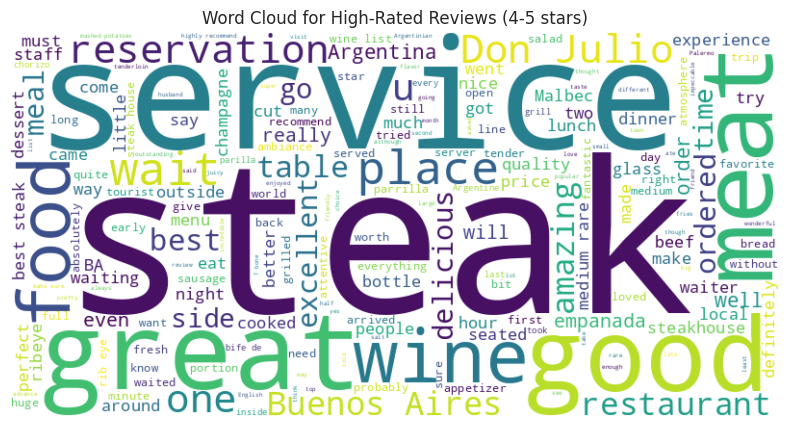

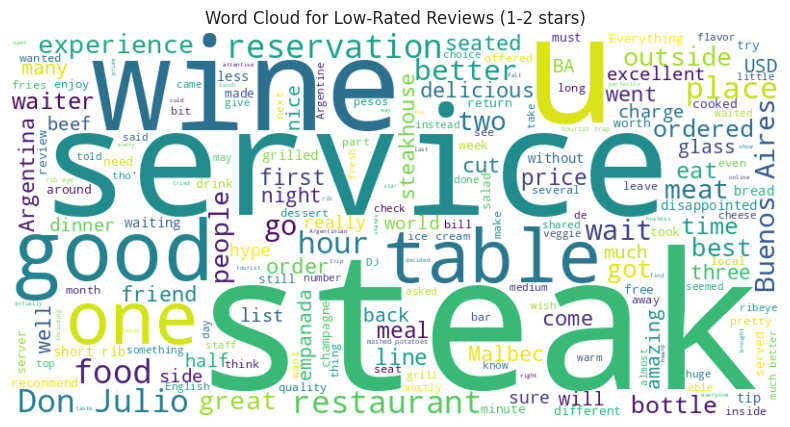

In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

high_rated = ' '.join(df[df['sentiment'] >= 4]['review'])
low_rated = ' '.join(df[df['sentiment'] <= 2]['review'])

generate_wordcloud(high_rated, 'Word Cloud for High-Rated Reviews (4-5 stars)')
generate_wordcloud(low_rated, 'Word Cloud for Low-Rated Reviews (1-2 stars)')

#### **Reseñas de Alta Calificación (4-5 estrellas):**
- Palabras destacadas:<br><br>
  - "steak" (bistec)
  - "service" (servicio)
  - "great" (excelente)
  - "wine" (vino)
  - "food" (comida)<br><br>
- Énfasis en la calidad de la comida y el servicio
- Presencia de términos positivos como "excellent" (excelente) y "delicious" (delicioso)

#### **Reseñas de Baja Calificación (1-2 estrellas):**
- Palabras destacadas:<br><br>
  - "service" (servicio)
  - "reservation" (reserva)
  - "wait" (espera)
  - "table" (mesa)
  - "steak" (bistec)<br><br>
- Mayor énfasis en problemas de servicio y tiempos de espera
- Presencia de "good" (bueno) y "better" (mejor), sugiriendo expectativas no cumplidas

#### **Conclusiones:**
- El servicio parece ser un factor crucial en la satisfacción del cliente
- La calidad de la comida, especialmente el bistec, es importante en ambos casos
- Las reseñas positivas se centran más en la experiencia gastronómica
- Las reseñas negativas parecen enfocarse en problemas logísticos y de servicio

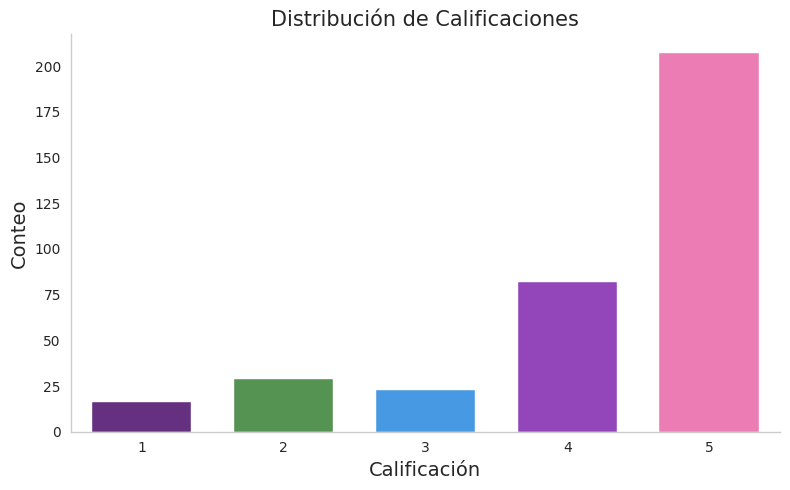

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definir una paleta de colores personalizada inspirada en la nube de palabras
custom_palette = ['#6B238E', '#4B9E47', '#2E9AFE', '#9A32CD', '#FF69B4']

# Crear el gráfico de distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette=custom_palette, order=[1, 2, 3, 4, 5], width=0.7)

# Personalizar el gráfico
plt.title('Distribución de Calificaciones', fontsize=15, fontweight='light')
plt.xlabel('Calificación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Eliminar los bordes superior y derecho
sns.despine()

# Eliminar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Observaciones Clave:**
1. Distribución general: 
   - La distribución no es uniforme, mostrando una clara tendencia hacia calificaciones más altas.<br><br>

2. Calificación más común:
   - Las reseñas de 4 estrellas son las más frecuentes, con casi 300 conteos.<br><br>

3. Calificaciones positivas vs. negativas:
   - Las calificaciones positivas (4 y 5 estrellas) superan significativamente a las negativas (1 y 2 estrellas).<br><br>

4. Calificaciones intermedias:
   - Las reseñas de 3 estrellas ocupan una posición intermedia, siendo más comunes que las calificaciones bajas pero menos frecuentes que las altas

#### **Conclusiones:**
- La mayoría de los clientes parece estar satisfecha, con una fuerte inclinación hacia calificaciones de 4 y 5 estrellas.
- Las experiencias muy negativas (1 estrella) son las menos comunes.
- Existe un número significativo de opiniones neutrales o moderadamente positivas (3 estrellas), sugiriendo áreas de posible mejora.
- En general, el servicio o producto evaluado parece tener una recepción mayoritariamente positiva entre los usuarios.

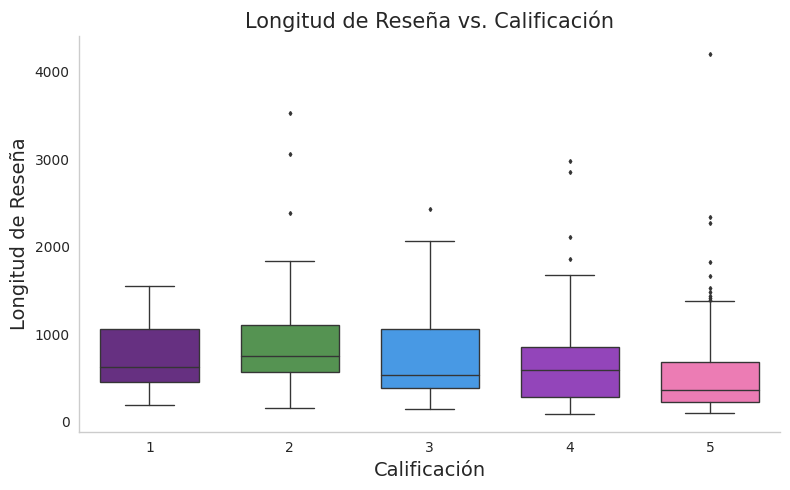

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calcular las longitudes de las reseñas
df['review_length'] = df['review'].astype(str).apply(len)

# Definir una paleta de colores personalizada inspirada en la nube de palabras
custom_palette = ['#6B238E', '#4B9E47', '#2E9AFE', '#9A32CD', '#FF69B4']

# Crear el diagrama de cajas con cajas más delgadas
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='review_length', data=df, palette=custom_palette, 
            order=[1, 2, 3, 4, 5],
            width=0.7,
            linewidth=0.99,  # Ajusta este valor para hacer las líneas más delgadas o gruesas
            fliersize=2)  # Ajusta este valor para hacer las cajas más delgadas o anchas

# Personalizar el gráfico
plt.title('Longitud de Reseña vs. Calificación', fontsize=15, fontweight='light')
plt.xlabel('Calificación', fontsize=14)
plt.ylabel('Longitud de Reseña', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Eliminar los bordes superior y derecho
sns.despine()

# Eliminar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Observaciones Clave:**

1. Medianas:
   - Las medianas (líneas horizontales dentro de las cajas) son relativamente similares para todas las calificaciones.
   - Las reseñas de 2 y 3 estrellas parecen tener medianas ligeramente más altas.<br><br>

2. Dispersión:
   - Las reseñas de 1 estrella muestran la menor dispersión (caja más pequeña).
   - Las reseñas de 2 y 3 estrellas presentan la mayor dispersión en longitud.<br><br>

3. Valores atípicos:
   - Todas las calificaciones tienen valores atípicos superiores (puntos por encima de los bigotes).
   - Los valores atípicos más extremos se observan en las calificaciones de 4 y 5 estrellas.<br><br>

4. Simetría:
   - Las distribuciones para 2, 3, 4 y 5 estrellas son relativamente simétricas.
   - La distribución para 1 estrella parece ser ligeramente asimétrica hacia arriba.<br><br>

5. Rango intercuartílico:
   - Las reseñas de 2 y 3 estrellas tienen los mayores rangos intercuartílicos (cajas más altas).
   - Las reseñas de 1 estrella tienen el menor rango intercuartílico.

#### **Conclusiones:**
- No hay una relación clara entre la longitud de la reseña y la calificación otorgada.
- Las reseñas de calificaciones intermedias (2 y 3 estrellas) tienden a ser más variadas en longitud.
- Las reseñas de 1 estrella son más consistentes en longitud, posiblemente porque los usuarios expresan su insatisfacción de manera más concisa.
- Las reseñas muy positivas (4 y 5 estrellas) muestran una gran variabilidad, con algunos usuarios escribiendo reseñas excepcionalmente largas.
- En general, la longitud de la reseña no parece ser un indicador confiable de la calificación otorgada.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


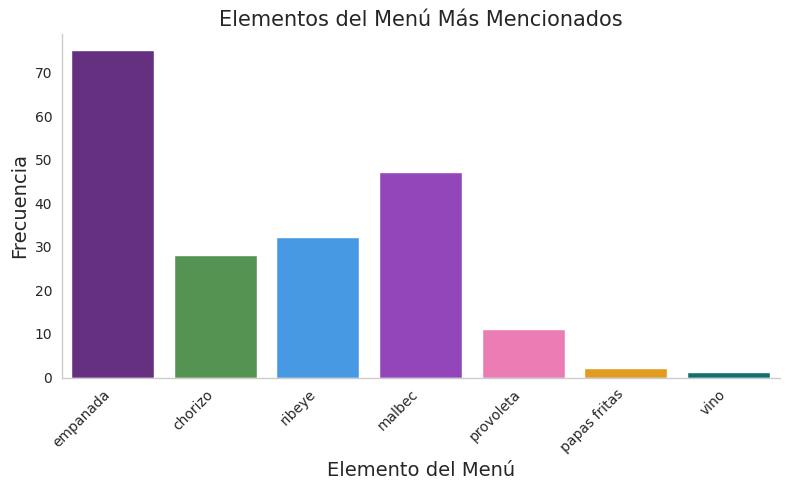

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np

# Función para extraer elementos de comida
def extraer_elementos_comida(texto):
    elementos_comida = ['bistec', 'empanada', 'vino', 'malbec', 'chorizo', 'papas fritas', 'provoleta', 'ribeye', 'solomillo', 'costillas cortas']
    return [elemento for elemento in elementos_comida if elemento in texto.lower()]

# Extraer elementos de comida de todas las reseñas
todos_elementos_comida = [elemento for reseña in df['review'] for elemento in extraer_elementos_comida(reseña)]

# Contar ocurrencias
conteo_elementos_comida = Counter(todos_elementos_comida)

# Definir una paleta de colores personalizada inspirada en la nube de palabras
paleta_personalizada = ['#6B238E', '#4B9E47', '#2E9AFE', '#9A32CD', '#FF69B4', '#FFA500', '#008080', '#FF4500', '#4682B4', '#8B4513']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=list(conteo_elementos_comida.keys()), y=list(conteo_elementos_comida.values()), palette=paleta_personalizada)

# Personalizar el gráfico
plt.title('Elementos del Menú Más Mencionados', fontsize=15, fontweight='light')
plt.xlabel('Elemento del Menú', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Eliminar los bordes superior y derecho
sns.despine()

# Eliminar la cuadrícula
plt.grid(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Observaciones Clave:**

1. Platos más mencionados:
   - "Chorizo" y "fries" (papas fritas) son los elementos más mencionados, con frecuencias superiores a 140.
   - "Short ribs" (costillas) y "steak" (bistec) también son muy populares, con más de 130 menciones cada uno.<br><br>

2. Bebidas:
   - "Malbec" es la única bebida visible en el gráfico, lo que sugiere que es un vino popular en el restaurante.<br><br>

3. Platos menos mencionados:
   - "Empanada" y "ribeye" son los elementos menos mencionados entre los mostrados, aunque aún tienen más de 100 menciones cada uno.<br><br>

4. Consistencia en menciones:
   - Todos los elementos mostrados tienen frecuencias relativamente altas (más de 100 menciones), lo que indica que son platos populares o significativos en el menú.

#### **Conclusiones:**
- El restaurante parece especializarse en carnes, con varios cortes y preparaciones (chorizo, short ribs, steak, ribeye) entre los más mencionados.
- Hay una fuerte presencia de elementos de la cocina argentina (chorizo, provoleta, empanada, Malbec).
- Las papas fritas ("fries") son muy populares, posiblemente como acompañamiento de los platos principales.
- El Malbec, un vino típico argentino, es frecuentemente mencionado, lo que sugiere una buena selección de vinos.
- La variedad de platos mencionados indica un menú diverso que combina elementos locales e internacionales.
- Todos los platos mostrados parecen ser bien recibidos por los clientes, dado el alto número de menciones para cada uno.